In [3]:
import numpy as np
import matplotlib.pyplot as plt
import jax
import copy
import queue
from tqdm import tqdm
import sys
sys.path.insert(1, os.path.join(sys.path[0], '..'))
from shower_sim_redone import make_simulator
from shower_sim_baseline import summary_metric


simulator = make_simulator()

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


8.595649 1.872489372563881 3260 2560


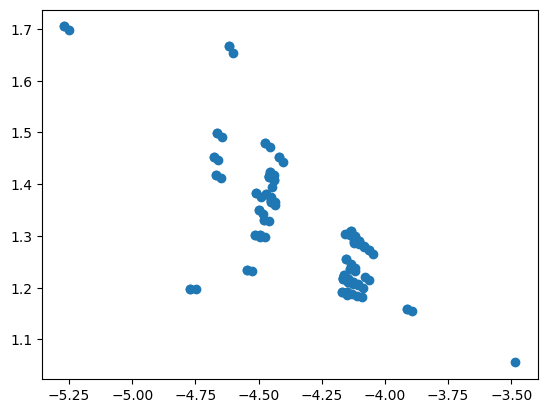

In [5]:
hits,active,history,scores,out_st = simulator(3.5, split_prob=1.0)

print(scores, out_st['w'], hits.size, out_st['y']['hits'].size)
plt.scatter(active[:,0],active[:,1])

In [67]:
def run_scan(par_vals, split_prob, reuse_rvs, N = 500, eps = 0.01):
    results = primal_list, primal_st_list, score_list, stad_list, numeric_list, dlogp_list = [], [], [], [], [], []


    for par_v in par_vals:
        print("############ par value=", par_v, "##################")
        primal, primal_st, score_val, stad_val, numeric_val, dlogp_val = [], [], [], [], [], []

        for i in tqdm(range(N)):
            hits,active,history,scores,out_st = simulator(par_v, split_prob = split_prob, reuse_rvs=reuse_rvs)
            _, active2, _, _, _ = simulator(par_v+eps, split_prob = split_prob, reuse_rvs=reuse_rvs)
            
            _val = summary_metric(active)
            _val2 = summary_metric(active2)
            
            primal.append(_val)
            primal_st.append(summary_metric(out_st['y']['active']))
            
            numeric_val.append( (_val2 - _val)/eps )
            
            score_val.append(scores*primal[i])
            dlogp_val.append(scores)
            stad_val.append(out_st['d'] + out_st['w']*(primal_st[i] - primal[i]))
            
        primal_list.append(primal)
        primal_st_list.append(primal_st)
        
        score_list.append(score_val)
        stad_list.append(stad_val)
        numeric_list.append(numeric_val)
        dlogp_list.append(dlogp_val)
        
    return results


par_vals = np.linspace(0.2,4.0,31)
results_eloss = run_scan(par_vals, split_prob=0.0, reuse_rvs=True, N = 500)
results_shower = run_scan(par_vals, split_prob=1.0, reuse_rvs=True, N = 500)

############ par value= 0.2 ##################


100%|██████████| 500/500 [00:13<00:00, 38.27it/s]


############ par value= 0.32666666666666666 ##################


100%|██████████| 500/500 [00:13<00:00, 36.35it/s]


############ par value= 0.4533333333333333 ##################


100%|██████████| 500/500 [00:14<00:00, 33.89it/s]


############ par value= 0.58 ##################


100%|██████████| 500/500 [00:15<00:00, 31.58it/s]


############ par value= 0.7066666666666666 ##################


100%|██████████| 500/500 [00:16<00:00, 29.94it/s]


############ par value= 0.8333333333333333 ##################


100%|██████████| 500/500 [00:18<00:00, 27.31it/s]


############ par value= 0.96 ##################


100%|██████████| 500/500 [00:18<00:00, 27.50it/s]


############ par value= 1.0866666666666664 ##################


100%|██████████| 500/500 [00:19<00:00, 25.47it/s]


############ par value= 1.2133333333333332 ##################


100%|██████████| 500/500 [00:20<00:00, 24.14it/s]


############ par value= 1.3399999999999999 ##################


100%|██████████| 500/500 [00:21<00:00, 23.03it/s]


############ par value= 1.4666666666666666 ##################


100%|██████████| 500/500 [00:22<00:00, 22.22it/s]


############ par value= 1.593333333333333 ##################


100%|██████████| 500/500 [00:23<00:00, 21.56it/s]


############ par value= 1.7199999999999998 ##################


100%|██████████| 500/500 [00:24<00:00, 20.44it/s]


############ par value= 1.8466666666666665 ##################


100%|██████████| 500/500 [00:25<00:00, 19.39it/s]


############ par value= 1.973333333333333 ##################


100%|██████████| 500/500 [00:26<00:00, 18.85it/s]


############ par value= 2.0999999999999996 ##################


100%|██████████| 500/500 [00:27<00:00, 18.37it/s]


############ par value= 2.2266666666666666 ##################


100%|██████████| 500/500 [00:28<00:00, 17.62it/s]


############ par value= 2.353333333333333 ##################


100%|██████████| 500/500 [00:29<00:00, 16.85it/s]


############ par value= 2.48 ##################


100%|██████████| 500/500 [00:30<00:00, 16.31it/s]


############ par value= 2.6066666666666665 ##################


100%|██████████| 500/500 [00:31<00:00, 15.90it/s]


############ par value= 2.7333333333333334 ##################


100%|██████████| 500/500 [00:32<00:00, 15.51it/s]


############ par value= 2.86 ##################


100%|██████████| 500/500 [00:34<00:00, 14.52it/s]


############ par value= 2.9866666666666664 ##################


100%|██████████| 500/500 [00:36<00:00, 13.89it/s]


############ par value= 3.1133333333333333 ##################


100%|██████████| 500/500 [00:38<00:00, 12.84it/s]


############ par value= 3.2399999999999998 ##################


100%|██████████| 500/500 [00:40<00:00, 12.34it/s]


############ par value= 3.3666666666666663 ##################


100%|██████████| 500/500 [00:40<00:00, 12.49it/s]


############ par value= 3.493333333333333 ##################


100%|██████████| 500/500 [00:39<00:00, 12.55it/s]


############ par value= 3.6199999999999997 ##################


100%|██████████| 500/500 [00:41<00:00, 12.03it/s]


############ par value= 3.746666666666666 ##################


100%|██████████| 500/500 [00:44<00:00, 11.20it/s]


############ par value= 3.873333333333333 ##################


100%|██████████| 500/500 [00:46<00:00, 10.75it/s]


############ par value= 4.0 ##################


100%|██████████| 500/500 [00:48<00:00, 10.23it/s]


############ par value= 0.2 ##################


100%|██████████| 500/500 [01:01<00:00,  8.17it/s]


############ par value= 0.32666666666666666 ##################


100%|██████████| 500/500 [01:00<00:00,  8.26it/s]


############ par value= 0.4533333333333333 ##################


100%|██████████| 500/500 [01:02<00:00,  7.97it/s]


############ par value= 0.58 ##################


100%|██████████| 500/500 [01:07<00:00,  7.39it/s]


############ par value= 0.7066666666666666 ##################


100%|██████████| 500/500 [01:14<00:00,  6.68it/s]


############ par value= 0.8333333333333333 ##################


100%|██████████| 500/500 [01:16<00:00,  6.57it/s]


############ par value= 0.96 ##################


100%|██████████| 500/500 [01:16<00:00,  6.57it/s]


############ par value= 1.0866666666666664 ##################


100%|██████████| 500/500 [01:18<00:00,  6.38it/s]


############ par value= 1.2133333333333332 ##################


100%|██████████| 500/500 [01:21<00:00,  6.14it/s]


############ par value= 1.3399999999999999 ##################


100%|██████████| 500/500 [01:28<00:00,  5.63it/s]


############ par value= 1.4666666666666666 ##################


100%|██████████| 500/500 [01:27<00:00,  5.72it/s]


############ par value= 1.593333333333333 ##################


100%|██████████| 500/500 [01:30<00:00,  5.51it/s]


############ par value= 1.7199999999999998 ##################


100%|██████████| 500/500 [01:32<00:00,  5.41it/s]


############ par value= 1.8466666666666665 ##################


100%|██████████| 500/500 [01:35<00:00,  5.24it/s]


############ par value= 1.973333333333333 ##################


100%|██████████| 500/500 [01:30<00:00,  5.53it/s]


############ par value= 2.0999999999999996 ##################


100%|██████████| 500/500 [01:34<00:00,  5.27it/s]


############ par value= 2.2266666666666666 ##################


100%|██████████| 500/500 [01:38<00:00,  5.07it/s]


############ par value= 2.353333333333333 ##################


100%|██████████| 500/500 [01:38<00:00,  5.10it/s]


############ par value= 2.48 ##################


100%|██████████| 500/500 [01:46<00:00,  4.68it/s]


############ par value= 2.6066666666666665 ##################


100%|██████████| 500/500 [01:49<00:00,  4.57it/s]


############ par value= 2.7333333333333334 ##################


100%|██████████| 500/500 [01:48<00:00,  4.59it/s]


############ par value= 2.86 ##################


100%|██████████| 500/500 [01:44<00:00,  4.78it/s]


############ par value= 2.9866666666666664 ##################


100%|██████████| 500/500 [01:51<00:00,  4.48it/s]


############ par value= 3.1133333333333333 ##################


100%|██████████| 500/500 [01:56<00:00,  4.31it/s]


############ par value= 3.2399999999999998 ##################


100%|██████████| 500/500 [01:55<00:00,  4.33it/s]


############ par value= 3.3666666666666663 ##################


100%|██████████| 500/500 [02:00<00:00,  4.16it/s]


############ par value= 3.493333333333333 ##################


100%|██████████| 500/500 [01:58<00:00,  4.22it/s]


############ par value= 3.6199999999999997 ##################


100%|██████████| 500/500 [01:58<00:00,  4.22it/s]


############ par value= 3.746666666666666 ##################


100%|██████████| 500/500 [01:58<00:00,  4.21it/s]


############ par value= 3.873333333333333 ##################


100%|██████████| 500/500 [02:07<00:00,  3.94it/s]


############ par value= 4.0 ##################


100%|██████████| 500/500 [02:14<00:00,  3.72it/s]


In [68]:
np.savez('results_shower',**{'results_shower': results_shower, 'results_eloss': results_eloss})

In [69]:
data_landscape = dict(np.load('results_shower.npz', allow_pickle=True))

In [73]:
data = np.load('runs.npz', allow_pickle=True)
data = dict(data)

In [93]:
mode = 'eloss'
results = data_landscape[f'results_{mode}']
grads = data[f'gradients_{mode}']
fname = f'overview_{mode}.pdf'

(31, 500)


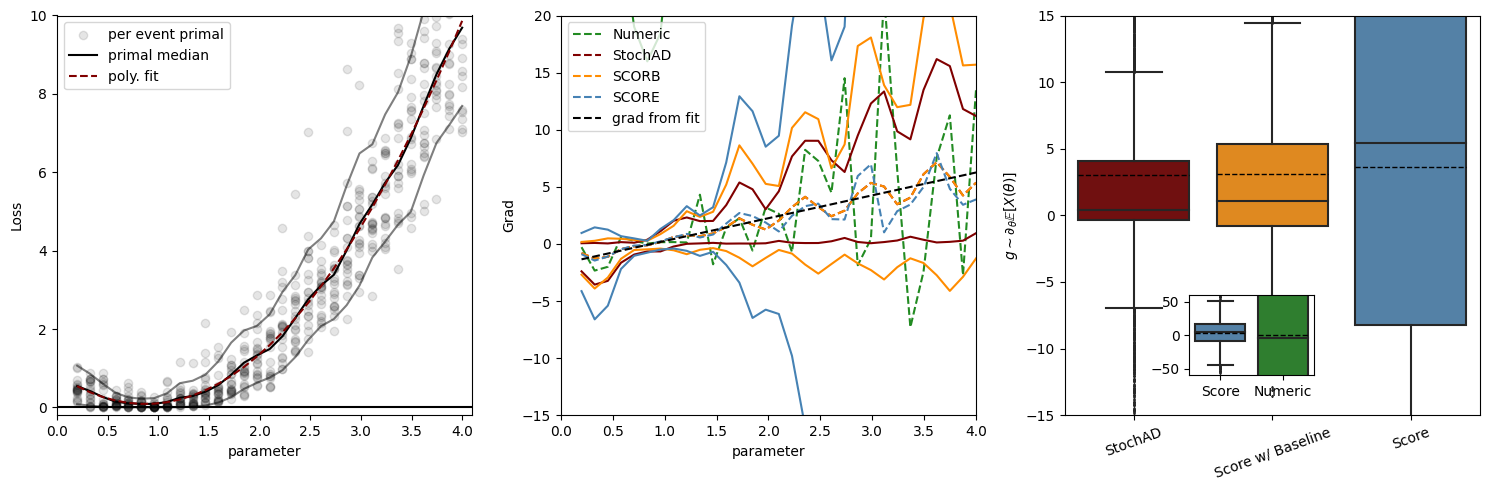

In [94]:
import numpy as np
from plot_loss_landscape import plot_loss_landscape_primal, plot_loss_landscape_gradients
from plots_gradients import plot_variance_with_inset

primal_list, primal_st_list, score_list, stad_list, numeric_list, dlogp_list = results
numeric_fit = np.polynomial.Polynomial.fit(par_vals, np.mean(primal_list, axis=-1), 2)
primal_list = np.array(primal_list)
numeric_list = np.array(numeric_list)
score_list = np.array(score_list)
dlogp_list = np.array(dlogp_list)
score_baseline_list = score_list - dlogp_list*np.mean(primal_list, axis=1).reshape(-1,1)
stad_list = np.array(stad_list)

f,axarr = plt.subplots(1,3)
plot_loss_landscape_primal(axarr[0],numeric_fit, par_vals, primal_list)
plot_loss_landscape_gradients(axarr[1],
    numeric_fit,
    par_vals,
    numeric_list,
    score_list,
    score_baseline_list,
    stad_list,
)

plot_variance_with_inset(axarr[2],grads)
f.set_size_inches(15,5)
f.tight_layout()
f.savefig(fname)

In [81]:
!open .